In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import model_from_json


/Users/nityamshrestha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

## Import Data

In [29]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Create the model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



## User image import

In [6]:
import PIL.ImageOps
from PIL import Image, ImageFilter

def img_bw(argv, mode = True):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')    
    im = im.resize((28, 28), Image.ANTIALIAS)
#     im = im.reshape(28, 28)
    if(mode):
        im = PIL.ImageOps.invert(im)
    return list(im.getdata())

## Testing my images

In [7]:
pic1 = [img_bw('./pure_image/mark000.png'), 
        img_bw('./pure_image/mark001.png'),
       img_bw('./pure_image/mark002.png'), 
        img_bw('./pure_image/mark003.png'),
       img_bw('./pure_image/mark004.png'), 
        img_bw('./pure_image/mark005.png'),
       img_bw('./pure_image/mark006.png'), 
        img_bw('./pure_image/mark007.png'),
       img_bw('./pure_image/mark008.png'), 
        img_bw('./pure_image/mark009.png')]#file path here
pic1 = np.array(pic1)
pic1 = pic1.astype(np.float32)
pic1 = pic1.reshape(pic1.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
pic1 = pic1.astype('float32')
pic1 /= 255


In [8]:
pic2 = [img_bw('./pure_image/00.png'), 
        img_bw('./pure_image/01.png'),
       img_bw('./pure_image/02.png'), 
        img_bw('./pure_image/03.png'),
       img_bw('./pure_image/04.png'), 
        img_bw('./pure_image/05.png'),
       img_bw('./pure_image/06.png'), 
        img_bw('./pure_image/07.png'),
       img_bw('./pure_image/08.png'), 
        img_bw('./pure_image/09.png')]#file path here
pic2 = np.array(pic2)
pic2 = pic2.astype(np.float32)

pic2 = pic2.reshape(pic2.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
pic2 = pic2.astype('float32')
pic2 /= 255

In [9]:
pic3 = [img_bw('./pure_image/twist0.png'), 
        img_bw('./pure_image/twist1.png'),
       img_bw('./pure_image/twist2.png'), 
        img_bw('./pure_image/twist3.png'),
       img_bw('./pure_image/twist4.png'), 
        img_bw('./pure_image/twist5.png'),
       img_bw('./pure_image/twist6.png'), 
        img_bw('./pure_image/twist7.png'),
       img_bw('./pure_image/twist8.png'), 
        img_bw('./pure_image/twist9.png')]#file path here
pic3 = np.array(pic3)
pic3 = pic3.astype(np.float32)

pic3 = pic3.reshape(pic3.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
pic3 = pic3.astype('float32')
pic3 /= 255

## Train the Model

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=8,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



#### Saved Files:
OG(12) = model_og.h5 --> Done

        

OG(12) + Shifted = model_og_shifted.h5

OG(12) + Shifted + fliped = model_og_shift_flip.h5


model_og_shift_flip.h5 + OG(16) = model_og_aug_16.h5

Merged Dataset:

    OG + shifted(og/2) + flipped(og/2) = model_merged.h5

# Saving files

In [ ]:
model_json = myModel.to_json()

with open("model_json_shifted_rots.json", "w") as json_file:
    json_file.write(model_json)

myModel.save_weights("model_og_shifted_rots.h5")

# Opening Files

In [10]:
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
myModel = model_from_json(loaded_model_json)
# load weights into new model
myModel.load_weights("model_og.h5")
print("Loaded model from disk")

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Loaded model from disk


In [11]:
myModel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
score = myModel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0274912404745799
Test accuracy: 0.9912


# My Predictions

In [ ]:
predicted_classes = myModel.predict_classes(pic1)
print(predicted_classes)

In [ ]:
predicted_classes = myModel.predict_classes(pic2)
print(predicted_classes)

In [ ]:
predicted_classes = myModel.predict_classes(pic3)
print(predicted_classes)

In [ ]:
myModel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

## Preparing Augmented Images

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot 
import PIL.ImageOps
import numpy as np

In [14]:
batch = 60000;

In [27]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Creating Shifted images

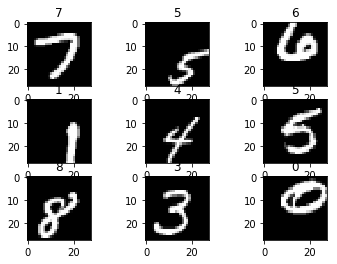

In [16]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_train_shift, y_batch in datagen.flow(x_train, y_train, batch_size=batch):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_train_shift[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        pyplot.title(y_batch[i])
    # show the plot
    pyplot.show()
    break

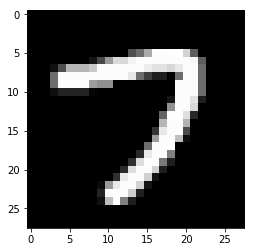

In [17]:
pyplot.imshow(X_train_shift[0].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

In [18]:
X_train_shift = X_train_shift.astype('float32')
X_test_shift = x_test.astype('float32')

X_train_shift /= 255
X_test_shift /= 255

print('x_train shape:', X_train_shift.shape)
print(X_train_shift.shape[0], 'train samples')
print(X_test_shift.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
# convert class vectors to binary class matrices
y_batch_shift = keras.utils.to_categorical(y_batch, num_classes)
y_test_shift = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(X_train_shift.shape)
print(y_batch_shift.shape)
print(y_test_shift.shape)
print(X_test_shift.shape)

In [ ]:
myModel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [21]:
myModel.fit(X_train_shift, y_batch_shift,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_shift, y_test_shift))
score = myModel.evaluate(X_test_shift, y_test_shift, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 169s 3ms/step - loss: 2.3026 - acc: 0.1116 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 175s 3ms/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 155s 3ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 154s 3ms/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 154s 3ms/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 649s 11ms/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 -

In [31]:
score = myModel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05019276161667704
Test accuracy: 0.9858


#### Creating Rotated Images

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=180)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch_rotation, y_batch in datagen.flow(x_train, y_train, batch_size=batch):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch_rotation[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        pyplot.title(y_batch[i])
    # show the plot
    pyplot.show()
    break

In [ ]:
print(X_batch_rotation.shape)
print(y_batch.shape)

In [ ]:
X_train_rot = X_batch_rotation.astype('float32')
X_test_shift = x_test.astype('float32')

X_train_rot /= 255
X_test_shift /= 255

print('x_train shape:', X_train_rot.shape)
print(X_train_rot.shape[0], 'train samples')
print(X_test_shift.shape[0], 'test samples')

In [ ]:
# convert class vectors to binary class matrices
y_train_rot = keras.utils.to_categorical(y_batch, num_classes)
y_test_rot = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
myModel.fit(X_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_shift, y_test_rot))
score = myModel.evaluate(X_test_shift, y_test_rot, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
score = myModel.evaluate(X_test_shift, y_test_rot, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### Creating Flipped Images

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch_flip, y_batch in datagen.flow(x_train, y_train, batch_size=batch):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch_flip[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        pyplot.title(y_batch[i])
    # show the plot
    pyplot.show()
    break

In [ ]:
X_train_flipped = X_batch_flip.astype('float32')
X_test_shift = x_test.astype('float32')

X_train_flipped /= 255
X_test_shift /= 255

print('x_train shape:', X_train_flipped.shape)
print(X_train_flipped.shape[0], 'train samples')
print(X_test_shift.shape[0], 'test samples')

In [ ]:
# convert class vectors to binary class matrices
y_train_flip = keras.utils.to_categorical(y_batch, num_classes)
y_test_flip = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
myModel.fit(X_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_shift, y_test_rot))
score = myModel.evaluate(X_test_shift, y_test_rot, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### Creating Whitend Images

In [ ]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train_whitening)
# configure batch size and retrieve one batch of images
for X_batch_whitening, y_batch in datagen.flow(X_train_whitening, y_train, batch_size=batch):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch_whitening[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.title(y_batch[i])
    # show the plot
    plt.show()
    break

In [ ]:
# convert class vectors to binary class matrices
y_batch_shift = keras.utils.to_categorical(y_batch, num_classes)
y_test_shift = keras.utils.to_categorical(y_test, num_classes)